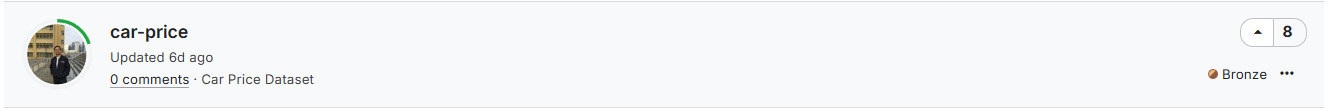

In [1]:
import numpy as np
import pandas as pd
import os



In [4]:
data = pd.read_csv("../car_price_dataset.csv")
display(data.head())
display(data.info())

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


None

In [5]:
data = data.dropna()

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [8]:
print("Dataset Columns:", data.columns.tolist())

Dataset Columns: ['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage', 'Doors', 'Owner_Count', 'Price']


In [ ]:
price_col = [col for col in data.columns if 'price' in col.lower()]
if not price_col:
    raise KeyError("No column related to 'price' found in dataset")
price_col = price_col[0]

'Price'

In [11]:
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

In [12]:
data

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,4.2,0,1,289944,3,5,8501
1,2,19,2012,2.0,2,0,5356,2,3,12092
2,7,16,2020,4.2,0,0,231440,4,2,11171
3,0,22,2023,2.0,1,1,160971,2,1,11780
4,9,17,2003,2.6,2,2,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,6,20,2004,3.7,0,2,5794,2,4,8884
9996,2,18,2002,1.4,1,0,168000,2,1,6240
9997,1,0,2010,3.0,3,0,86664,5,1,9866
9998,3,13,2002,1.4,2,0,225772,4,1,4084


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = data.drop(columns=[price_col])
y = data[price_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [16]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}')

MAE: 370.26852, RMSE: 466.932416295442, R2 Score: 0.9762700972791581


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

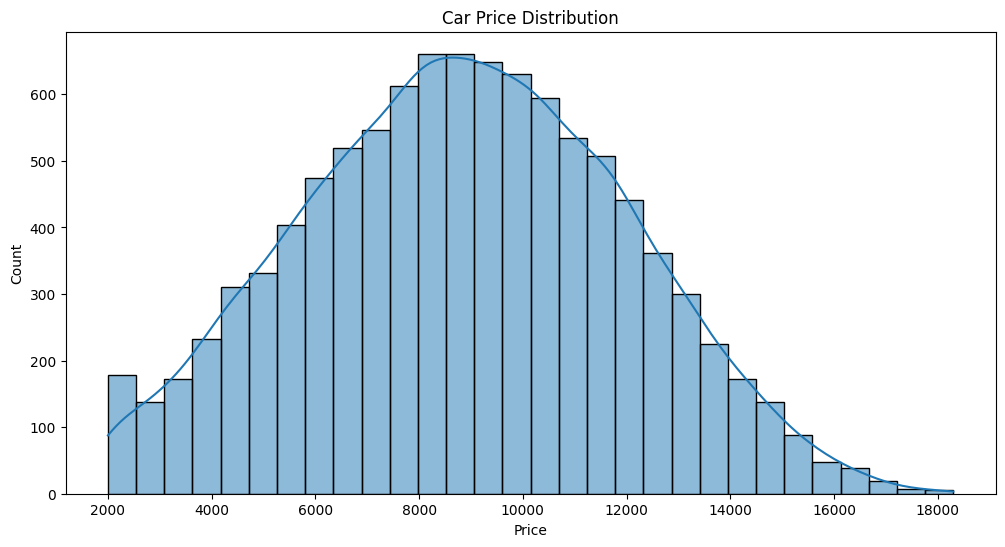

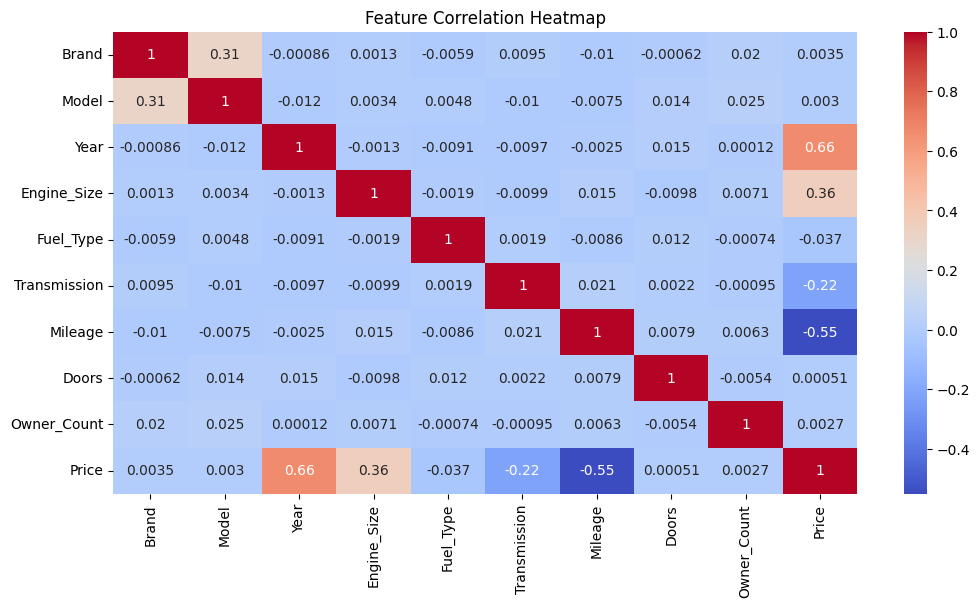

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(y, bins=30, kde=True)
plt.title("Car Price Distribution")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

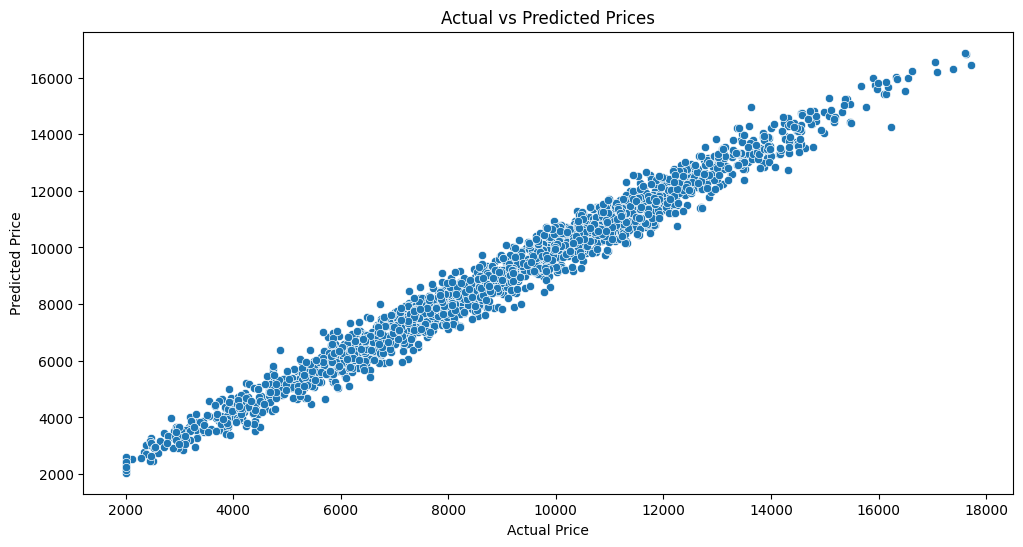

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

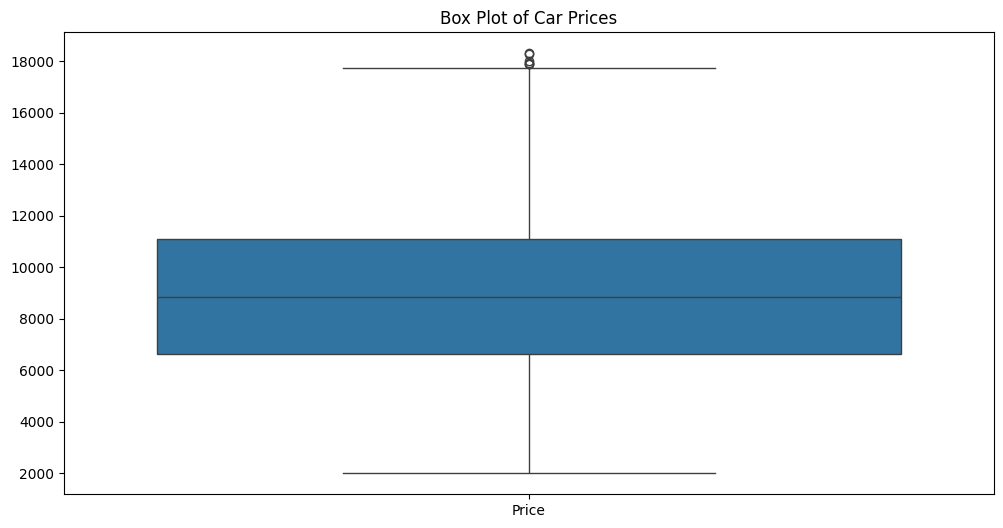

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[[price_col]])
plt.title("Box Plot of Car Prices")
plt.show()

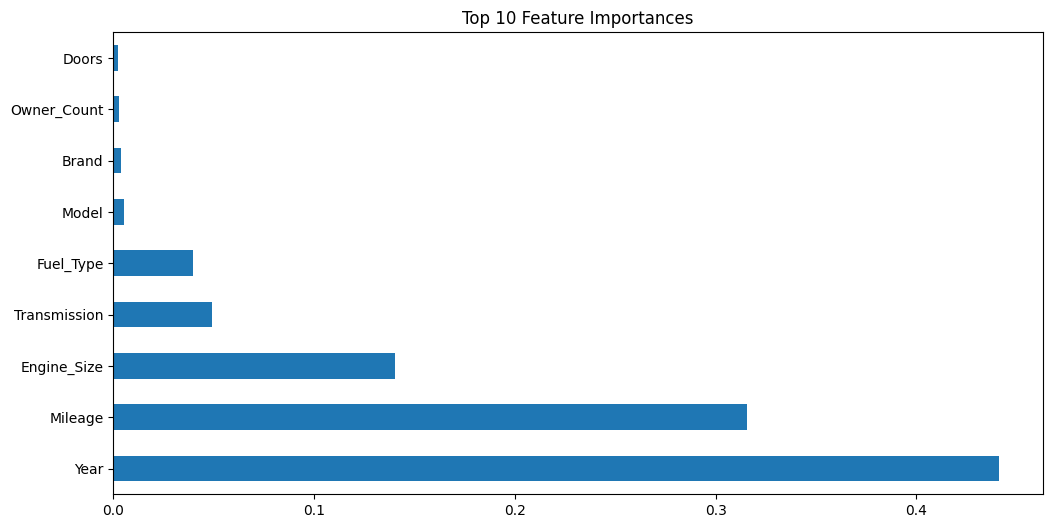

In [24]:
plt.figure(figsize=(12, 6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()